# [혼자 공부하는 머신러닝+딥러닝] 

# 1강_인공지능, 머신러닝 그리고 딥러닝이란 무엇인가?
> https://www.youtube.com/watch?v=J6wehCO_c58&list=PLVsNizTWUw7HpqmdphX9hgyWl15nobgQX

# 9강 로지스틱 회귀 알아보기
> https://www.youtube.com/watch?v=pO27UnTsYQU&list=PLVsNizTWUw7HpqmdphX9hgyWl15nobgQX&index=9&ab_channel=%ED%95%9C%EB%B9%9B%EB%AF%B8%EB%94%94%EC%96%

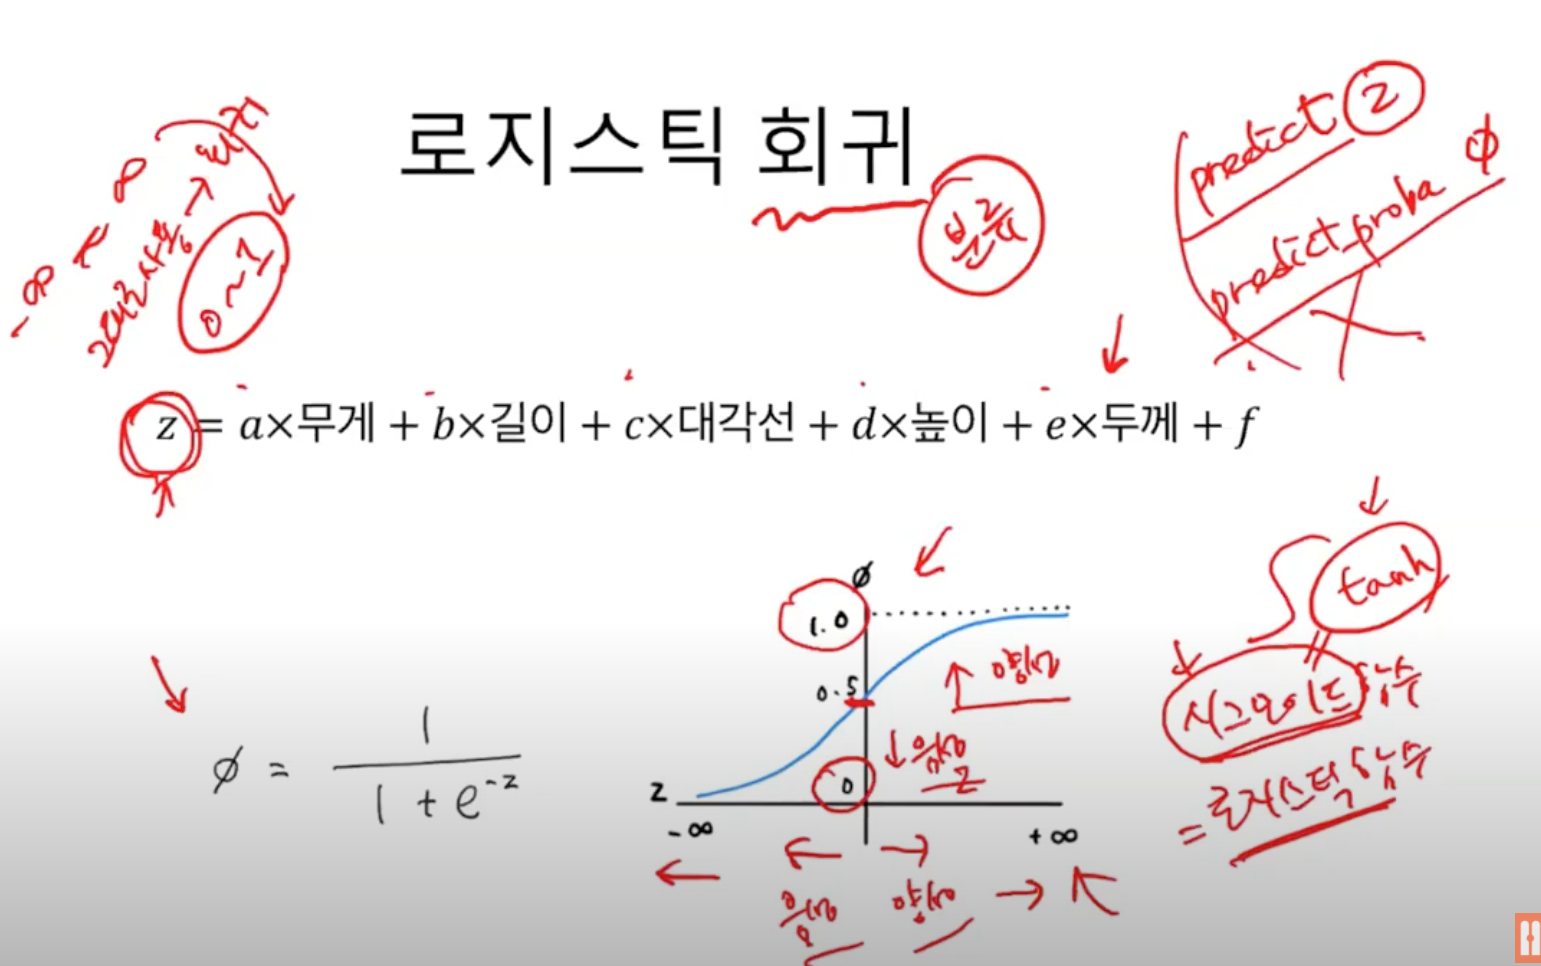

# 10강 확률적 경사 하강법 알아보기
> https://www.youtube.com/watch?v=A1UUnfijQfQ&list=PLVsNizTWUw7HpqmdphX9hgyWl15nobgQX&index=10&ab_channel=%ED%95%9C%EB%B9%9B%EB%AF%B8%EB%94%94%EC%96%B4

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish.shape

(159, 6)

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
fish_input[: 5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [6]:
fish_input.min(), fish_input.max()

(0.0, 1650.0)

## 훈련값에서 스케일링하여 찾은 통계값으로 훈련 데이터와 테스트 데이터를 변경하여야 함

In [7]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
train_input[: 5]

array([[720.    ,  35.    ,  40.6   ,  16.3618,   6.09  ],
       [500.    ,  45.    ,  48.    ,   6.96  ,   4.896 ],
       [  7.5   ,  10.5   ,  11.6   ,   1.972 ,   1.16  ],
       [110.    ,  22.    ,  23.5   ,   5.5225,   3.995 ],
       [140.    ,  20.7   ,  23.2   ,   8.5376,   3.2944]])

In [9]:
train_input.min(), train_input.max()

(0.0, 1650.0)

In [10]:
# 훈련 데이터에서 평균과 표준편차를 계산한 값에서 훈련셋트와 테스트셋트 변경
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
train_scaled[: 5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [12]:
train_scaled.min(), train_scaled.max()

(-2.0115469357305984, 3.53737799284675)

## SGDClassifier
> 확률적 경사하강법의 분류 알고리즘 (SGDRegressor는 확률적 경사하강법의 회귀 알고리즘)

In [13]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## fit 메소드는 이전의 가중치와 절편을 버리고 새로 학습, partial_fit은 기존의 학습에서의 가중치와 절편을 유지하면서 한번 더 학습시키는 메소드

In [15]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


In [16]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7815126050420168
0.775


In [17]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8319327731092437
0.8


In [19]:
import numpy as np
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [20]:
sc.partial_fit(train_scaled, train_target, classes)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8739495798319328
0.85


In [21]:
sc.partial_fit(train_scaled, train_target, classes)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.865546218487395
0.9


In [22]:
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

# 시각화를 통해 iter 값을 찾음 (max_iter=100)
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [23]:
import matplotlib.pyplot as plt

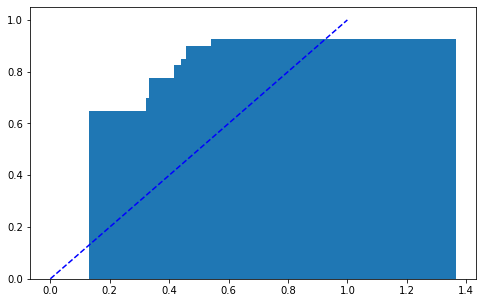

In [28]:
plt.figure(figsize=(8, 5))
plt.bar(train_score, test_score)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')

# 11강 로지스틱 회귀로 와인 분류하기 & 결정 트리
> https://www.youtube.com/watch?v=tOzxDGp8rsg&list=PLVsNizTWUw7HpqmdphX9hgyWl15nobgQX&index=11&ab_channel=%ED%95%9C%EB%B9%9B%EB%AF%B8%EB%94%94%EC%96%B4